In [1]:
!mkdir data
!wget https://github.com/yk4r2/AAA/blob/main/Experiments/homeworks/HW1/data/user_transactions.csv?raw=true -O data/user_transactions.csv

--2021-04-16 20:27:42--  https://github.com/yk4r2/AAA/blob/main/Experiments/homeworks/HW1/data/user_transactions.csv?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yk4r2/AAA/raw/main/Experiments/homeworks/HW1/data/user_transactions.csv [following]
--2021-04-16 20:27:42--  https://github.com/yk4r2/AAA/raw/main/Experiments/homeworks/HW1/data/user_transactions.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yk4r2/AAA/main/Experiments/homeworks/HW1/data/user_transactions.csv [following]
--2021-04-16 20:27:42--  https://raw.githubusercontent.com/yk4r2/AAA/main/Experiments/homeworks/HW1/data/user_transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conne

In [2]:
from matplotlib.pyplot import figure

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import random
from statsmodels.stats.power import tt_ind_solve_power
from math import ceil

def date_converter(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
import warnings
warnings.filterwarnings("ignore")

Срок выполнения задания: 11 марта 10 утра. 

### Задание
Вам предстоит разработать дизайн эксперимента по тестированию монетизационных продуктов.
В конечном счёте, в монтизационных продуктах нас всегда интересует увеличение выручки, 
но к сожалению не всегда мы можем зафиксировать изменение именно этой метрики.

#### Кейс
Вы аналитик в продуктовой дискавери команде.
На текущий момент приближается начало нового квартала и вам необходимо спланировать
эксперименты в нём.

У вас есть два продукта:
- один базовый продукт, который предоставляет минимальный набор услуг на вашем ресурсе;
- один продвинутый продукт, который предоставляет расширенный набор услуг.

На текущий момент на квартал у вашей команды есть для проверки две гипотезы:
- Дополнительное информирование об эффективности услуг будет стимулировать их покупку;
- Повышение цены базового продукта должно стимулировать покупку продвинутого продукта


#### Для планирования эксперимента изучите данные и метрики:

- Загрузите файл и изучите данные;
- Подумайте над тем, какие метрики можно выделить на основе этих данных: выручка, пользователи, транзакции, средний чек и т.д.
- Постройте графики плотности распределения для этих метрик и сделайте выводы о характере распределений: тип, наличие выбросов, насколько сильный разброс.
- Изучите основные статистики этих метрик: среднее, стандартное отклонение;
- Изучите то, насколько эти статистики подвержены сезональности.


#### Формализуйте гипотезы:

- Опишите метрики и статистики, изменение которых вы ожидаете;
- Опишите какое изменение этих статистик вы ожидаете.

#### Предскажите минимально детектируемый эффект для своих метрик и спланируйте эксперименты внутри квартала:

- Принимая в расчёт максимально возможные размеры групп и ограничения по длительности в квартал рассмотрите разные планы проведения тестов и предскажите их чувствительность;
- Определите наиболее оптимальный план экспериментов. Обоснуйте, почему вы его считаете оптимальным.


#### Оптимизация плана
Подумайте о вариантах того, как можно ускорить эти эксперименты, т.к. всегда могут образоваться ситуации, когда ваши гипотезы не подтвердились и они требуют изменения или уточнения и необходимости повторных тестов. А цели достигать всегда хорошо в рамках отведённого на них срока.

#### Описание данныx

event_date - дата 

user_id - идентификатор пользователя

product - тип продукта

amount - сумма покупок

transactions - количество транзакций


### Выполнение задания

#### Первичное исследование датасета

In [4]:
df = pd.read_csv('data/user_transactions.csv')
df['event_date'] = df.event_date.apply(date_converter)

In [5]:
df.head()

,event_date,user_id,product,amount,transactions
0,2020-09-29,40746820883461494,basic,95.0,1
1,2020-09-29,41102328408008828,advanced,279.0,1
2,2020-09-29,63464894315144075,basic,64.0,1
3,2020-09-29,111526991873455341,basic,399.0,1
4,2020-09-29,169522572963414231,basic,199.0,1


In [6]:
df.describe()

,user_id,amount,transactions
count,1.278186e+06,1.278186e+06,1.278186e+06
mean,4.614241e+18,2.394618e+02,1.292690e+00
std,2.657074e+18,3.719033e+02,1.511153e+00
min,1.809139e+12,8.000000e+00,1.000000e+00
25%,2.311730e+18,8.900000e+01,1.000000e+00
50%,4.622499e+18,1.490000e+02,1.000000e+00
75%,6.906575e+18,2.590000e+02,1.000000e+00
max,9.223367e+18,1.081860e+05,7.680000e+02


In [7]:
df.shape

(1278186, 5)

Не ну вы чего, у гугла колаб щас сгорит)))

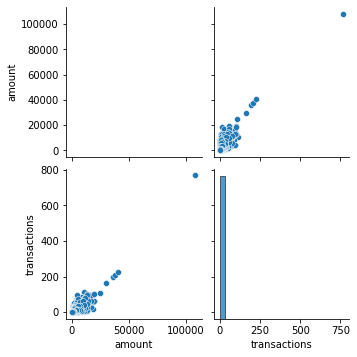

In [ ]:
sns.pairplot(df[['amount', 'transactions']])

Это что за (покемон) единорог О.о

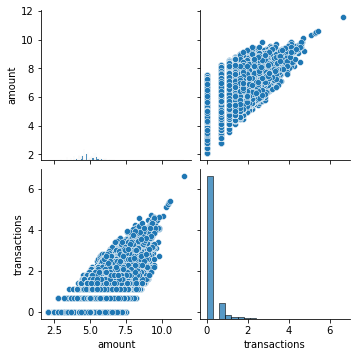

In [ ]:
sns.pairplot(df[['amount', 'transactions']].apply(np.log))

Давайте отрежем эти выбросы

In [8]:
df_1 = df[(df['amount'] < np.e ** 10)]

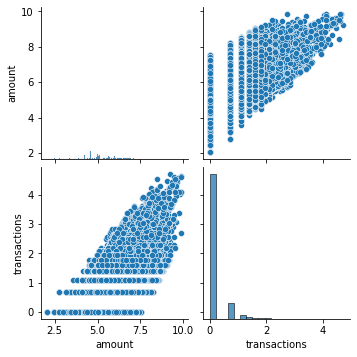

In [ ]:
sns.pairplot(df_1[['amount', 'transactions']].apply(np.log))

Фух, вроде отрезал выбросы

Вам тоже не нравится эта лесенка?))\
На самом деле она тут просто потому что там инты.

По идее, нам в целом будет пофигу на дату, если обрезать датасет по дате эксперимента. Давайте дропнем её, а взамен получим возросшую производительность пандаса и всё такое.

In [ ]:
df_1[df_1['product'] == 'basic']['event_date'].min() == df_1[df_1['product'] == 'advanced']['event_date'].min()

True

In [ ]:
df_1[df_1['product'] == 'basic']['event_date'].max() == df_1[df_1['product'] == 'advanced']['event_date'].max()

True

In [ ]:
len(df_1[df_1['product'] == 'basic']['event_date'])

990427

In [ ]:
len(df_1[df_1['product'] == 'advanced']['event_date'])

287753

Вот и первая подвоха: они совсем не сбалансированы. Ужас.

Посмотрим на парный плот в разрезе экспериментов

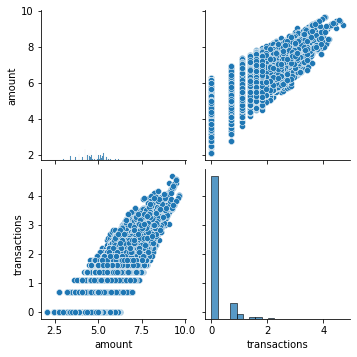

In [ ]:
sns.pairplot(df_1[df_1['product'] == 'basic'][['amount', 'transactions']].apply(np.log))

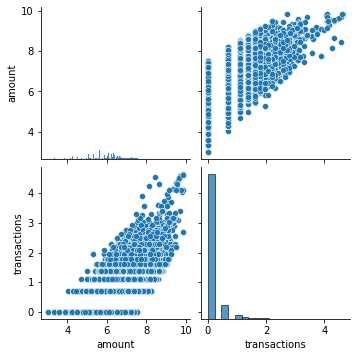

In [ ]:
sns.pairplot(df_1[df_1['product'] == 'advanced'][['amount', 'transactions']].apply(np.log))

Cудя по статистикам у advanced распределение amount сдвинуто по графику вверх

Как же блин хотелось дропнуть дату. Ладно, кажется, придётся её учитывать.

#### Допметрики

Подумайте над тем, какие метрики можно выделить на основе этих данных: выручка, пользователи, транзакции, средний чек и т.д.

Давайте получим:
- Средний чек на транзакцию для пользователя
- Средний чек на пользователя (без учёта даты, выходит)
- Количество транзакций для пользователя
- Общий чек на пользователя

In [9]:
print(len(df.groupby(['user_id', 'product']).sum()), len(df.groupby(['user_id']).sum()))

478454 446935


Ну вы чево, так нельзя делать. У вас один юзер в обеих группах бывает.

In [10]:
df2 = df.groupby(['user_id', 'product']).agg(['sum'])

In [11]:
df2.head()

,,amount,transactions
,,sum,sum
user_id,product,,
1809139296429,advanced,980.0,1
1912219714366,basic,300.0,3
23708868092799,basic,1094.0,16
45305541518475,basic,158.0,2
51991933272698,basic,199.0,2


In [12]:
df2.columns = ['total_amount', 'total_transactions']

In [13]:
df = df.merge(df2, on=['user_id', 'product'], how='left')

In [14]:
df['mean_amount'] = df['amount'] / df['transactions']

In [15]:
df.head()

,event_date,user_id,product,amount,transactions,total_amount,total_transactions,mean_amount
0,2020-09-29,40746820883461494,basic,95.0,1,285.0,3,95.0
1,2020-09-29,41102328408008828,advanced,279.0,1,5857.0,17,279.0
2,2020-09-29,63464894315144075,basic,64.0,1,64.0,1,64.0
3,2020-09-29,111526991873455341,basic,399.0,1,3591.0,9,399.0
4,2020-09-29,169522572963414231,basic,199.0,1,3324.0,17,199.0


In [ ]:
df_for_plotting = df[['user_id', 'mean_amount', 'product', 'amount', 'transactions']]
df_for_plotting['hash'] = pd.util.hash_pandas_object(df_for_plotting['user_id'])
df_for_plotting = df_for_plotting[df_for_plotting['hash'] % 10 == 0][['mean_amount', 'product', 'amount', 'transactions']]
df_for_plotting[['mean_amount', 'amount', 'transactions']] = df_for_plotting[['mean_amount', 'amount', 'transactions']].apply(np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1152x1152 with 0 Axes>

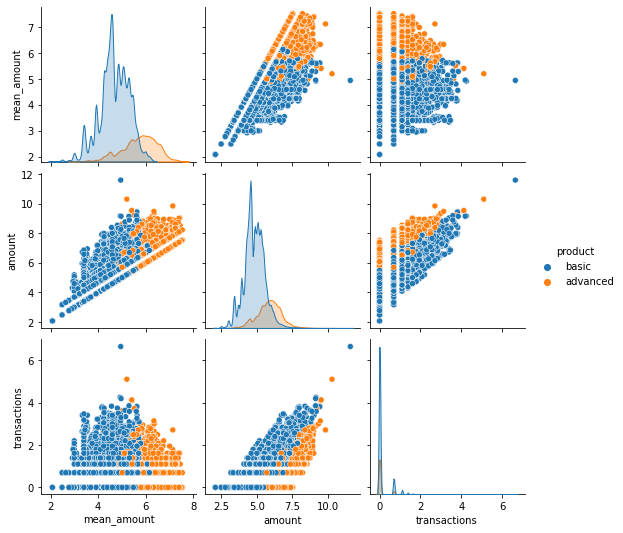

In [ ]:
figure(figsize=(16, 16))
sns.pairplot(df_for_plotting, hue='product')

После логарифмирования стало гораздо лучше.

Давайте честно сравним средний чек по группам

In [ ]:
len(df[df['transactions'] != 0])

1278186

product
advanced    AxesSubplot(0.125,0.125;0.775x0.755)
basic       AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_amount, dtype: object

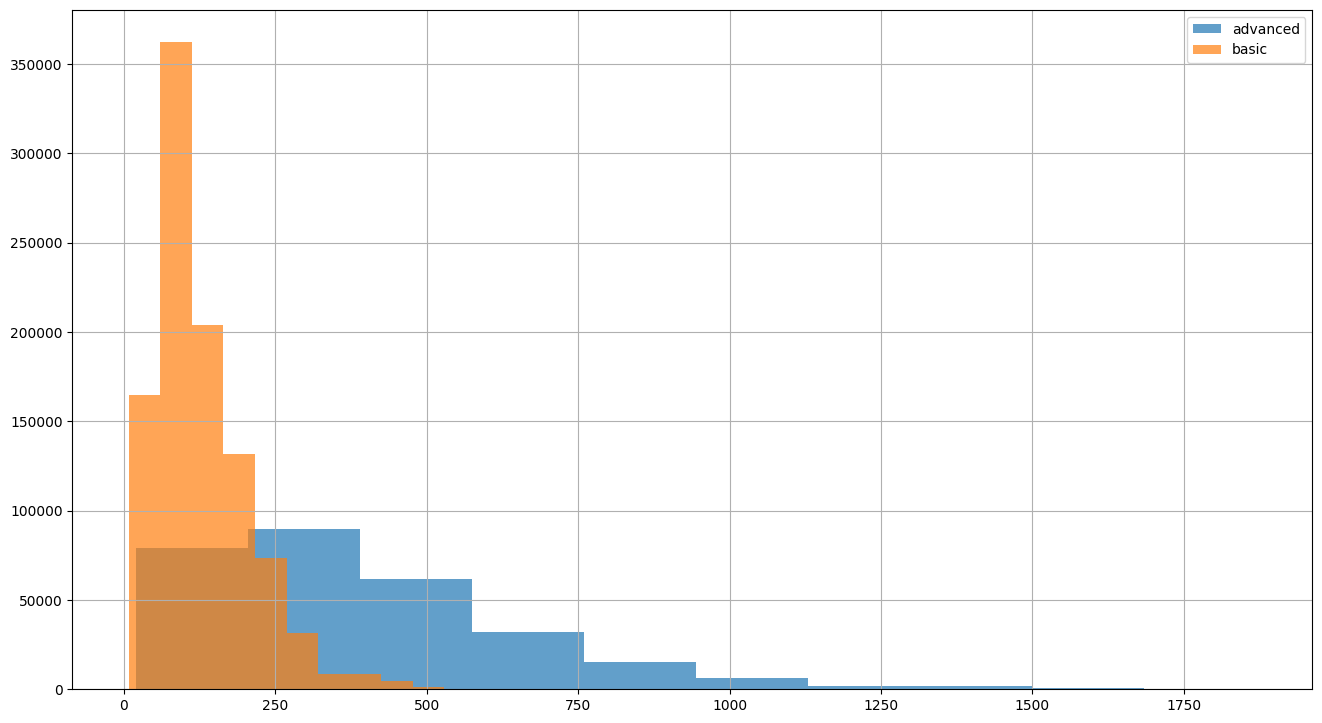

In [ ]:
figure(figsize=(16, 9), dpi=100)
df.groupby('product')['mean_amount'].hist(legend=True, alpha=0.7)

Ну не могут же люди из группы advanced тупо дороже продавать: им предложили кучу сложных настроек, в которых они могут закопаться, а они ВНЕЗАПНО стали продавать в 100 раз лучше. Скорее всего, дело в том, что advanced пользуются более опытные ребята.

#### Формализация гипотезы:

1. $H_0:$ \{Дополнительное информирование об эффективности услуг будет стимулировать их покупку\} $\cap$ \{Повышение цены базового продукта должно стимулировать покупку продвинутого продукта\}

    - Дополнительное информирование об эффективности услуг будет стимулировать их покупку $\Rightarrow$ общее количество транзакций растёт, а средний чек не двигается 
    - Повышение цены базового продукта должно стимулировать покупку продвинутого продукта $\Rightarrow$ рост среднего чека + рост средней выручки на пользователя, кажется что-то такое.

2. Хочется как-то придумать метрику.

    - Казалось бы, есть ARPU, но мне она не нравится, потому что в данном случае, кажется, она непросто считается.

    - Давайте возьмём вот какие метрики:
        - Средний чек в зависимости от типа продукта
        - Доля транзакций в зависимости от типа продукта
        - Средняя выручка на пользователя
        - Больше я не придумал, ибо тупенький

#### MDE

In [16]:
min_date = df['event_date'].min()
max_date = df['event_date'].max()
print(min_date, max_date, 'days:', (max_date - min_date).days)

2020-09-29 00:00:00 2020-12-29 00:00:00 days: 91


Допустим, мы хотим провести эксперимент как можно быстрее. Воспользуемся кодом из ноутбука, который был на уроке:

In [29]:
def choose_date(data, start_date, delta, share, grouper): 
    """
    Функция выбора 2 подвыборок из загруженных данных:
    data - входные данные;
    start_date - дата начала одвыборки;
    delta - длительность периода для подвыборки;
    share - доля пользователей в одной подвыборке.
    """
    tmp = data[(data.event_date >= start_date) &
               (data.event_date <= start_date + datetime.timedelta(days = delta)
               )]
    tmp['grouper_new'] = pd.util.hash_pandas_object(tmp[grouper])
    tmp = tmp.groupby(['grouper_new']).sum().reset_index()
    x = tmp[tmp['grouper_new'] % int(1 / share) == 1].reset_index()
    x.drop('grouper_new', axis=1)
    return x

Поставим максимальную возможную долю разбиения: 50%

In [49]:
def mde_getter(data, share, grouper, metric):
    start_date = data['event_date'].min()
    days_list = list(range(15, (data['event_date'].max() - start_date).days, 15))
    sample_vols = []

    for days in days_list:
        #получаем необходимую подвыборку
        x1 = choose_date(data, start_date, days, share, grouper) 

        mean = x1[metric].mean()
        std = x1[metric].std()

        alpha = 0.05
        power = 0.8
        # целевой размер относительного отклоенения исходной метрики
        result_effect = 0.04 
        effect_size = (mean / std) * result_effect

        sample_vol = tt_ind_solve_power(effect_size = effect_size,
                                        alpha = alpha,
                                        power = power,
                                        nobs1 = None,
                                        ratio = 1,
                                        alternative = 'two-sided',
                                        )
        sample_vols.append(sample_vol / x1.shape[0])
        
    
    return metric, days_list, sample_vols, share

In [50]:
metric, days_list, sample_vols, share = mde_getter(df, share=0.5, grouper='user_id', metric='amount')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

For amount and duration = 15 and group size = 0.5 we have to enlarge our duration in 0.19 times
For amount and duration = 30 and group size = 0.5 we have to enlarge our duration in 0.10 times
For amount and duration = 45 and group size = 0.5 we have to enlarge our duration in 0.07 times
For amount and duration = 60 and group size = 0.5 we have to enlarge our duration in 0.05 times
For amount and duration = 75 and group size = 0.5 we have to enlarge our duration in 0.04 times
For amount and duration = 90 and group size = 0.5 we have to enlarge our duration in 0.03 times


В общем я тут долго тупил и получал зашкаливающие результаты, потому что не понял, что `user_id` не рандомный.

In [51]:
metric, days_list, sample_vols, share = mde_getter(df, share=0.5, grouper='user_id', metric='mean_amount')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

For mean_amount and duration = 15 and group size = 0.5 we have to enlarge our duration in 0.08 times
For mean_amount and duration = 30 and group size = 0.5 we have to enlarge our duration in 0.04 times
For mean_amount and duration = 45 and group size = 0.5 we have to enlarge our duration in 0.03 times
For mean_amount and duration = 60 and group size = 0.5 we have to enlarge our duration in 0.02 times
For mean_amount and duration = 75 and group size = 0.5 we have to enlarge our duration in 0.02 times
For mean_amount and duration = 90 and group size = 0.5 we have to enlarge our duration in 0.01 times


In [52]:
metric, days_list, sample_vols, share = mde_getter(df, share=0.5, grouper='user_id', metric='total_amount')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

For total_amount and duration = 15 and group size = 0.5 we have to enlarge our duration in 1.28 times
For total_amount and duration = 30 and group size = 0.5 we have to enlarge our duration in 0.61 times
For total_amount and duration = 45 and group size = 0.5 we have to enlarge our duration in 0.39 times
For total_amount and duration = 60 and group size = 0.5 we have to enlarge our duration in 0.29 times
For total_amount and duration = 75 and group size = 0.5 we have to enlarge our duration in 0.23 times
For total_amount and duration = 90 and group size = 0.5 we have to enlarge our duration in 0.19 times


In [53]:
metric, days_list, sample_vols, share = mde_getter(df, share=0.5, grouper='user_id', metric='total_transactions')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

For total_transactions and duration = 15 and group size = 0.5 we have to enlarge our duration in 0.92 times
For total_transactions and duration = 30 and group size = 0.5 we have to enlarge our duration in 0.44 times
For total_transactions and duration = 45 and group size = 0.5 we have to enlarge our duration in 0.28 times
For total_transactions and duration = 60 and group size = 0.5 we have to enlarge our duration in 0.20 times
For total_transactions and duration = 75 and group size = 0.5 we have to enlarge our duration in 0.15 times
For total_transactions and duration = 90 and group size = 0.5 we have to enlarge our duration in 0.13 times


Давайте теперь посмотрим на другой размер выборки.

In [54]:
metric, days_list, sample_vols, share = mde_getter(df, share=0.25, grouper='user_id', metric='mean_amount')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

print() # Всегда ненавидел людей, которые так делают, а теперь сам делаю. Лол.
metric, days_list, sample_vols, share = mde_getter(df, share=0.10, grouper='user_id', metric='mean_amount')
for item in range(len(days_list)):
    print(f'For {metric} and duration = {days_list[item]} and group size = {share} we have to enlarge our duration in {sample_vols[item]:.2f} times')

For mean_amount and duration = 15 and group size = 0.25 we have to enlarge our duration in 0.17 times
For mean_amount and duration = 30 and group size = 0.25 we have to enlarge our duration in 0.09 times
For mean_amount and duration = 45 and group size = 0.25 we have to enlarge our duration in 0.06 times
For mean_amount and duration = 60 and group size = 0.25 we have to enlarge our duration in 0.04 times
For mean_amount and duration = 75 and group size = 0.25 we have to enlarge our duration in 0.03 times
For mean_amount and duration = 90 and group size = 0.25 we have to enlarge our duration in 0.03 times

For mean_amount and duration = 15 and group size = 0.1 we have to enlarge our duration in 0.42 times
For mean_amount and duration = 30 and group size = 0.1 we have to enlarge our duration in 0.22 times
For mean_amount and duration = 45 and group size = 0.1 we have to enlarge our duration in 0.15 times
For mean_amount and duration = 60 and group size = 0.1 we have to enlarge our durati

#### Оптимизация плана

Подумайте о вариантах того, как можно ускорить эти эксперименты, т.к. всегда могут образоваться ситуации, когда ваши гипотезы не подтвердились и они требуют изменения или уточнения и необходимости повторных тестов. А цели достигать всегда хорошо в рамках отведённого на них срока.

Во-первых, метрики бывают по-разному чувствительные, у нас вышла самой чувствительной `mean_amount`, наша ratio-метрика. Получается, что мы можем провести эксперимент хоть за неделю на выборке размера 10% от всех пользователей (затронув 20% всех пользователей), даже если не учитывать сезональность.\
Если же сезональность учитывать, выходит, что как раз есть смысл рассуждать в терминах одной недели.

Кстати, ещё как будто бы можно проверить гипотезы на не рандомно отобранных людях, но это уже сложновато, ибо могут возникнуть разные сайдэффекты.